<a href="https://colab.research.google.com/github/hinton024/Bharat-Intern/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


# Summary of Dataset

In [11]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# Histogram of Sepal Length

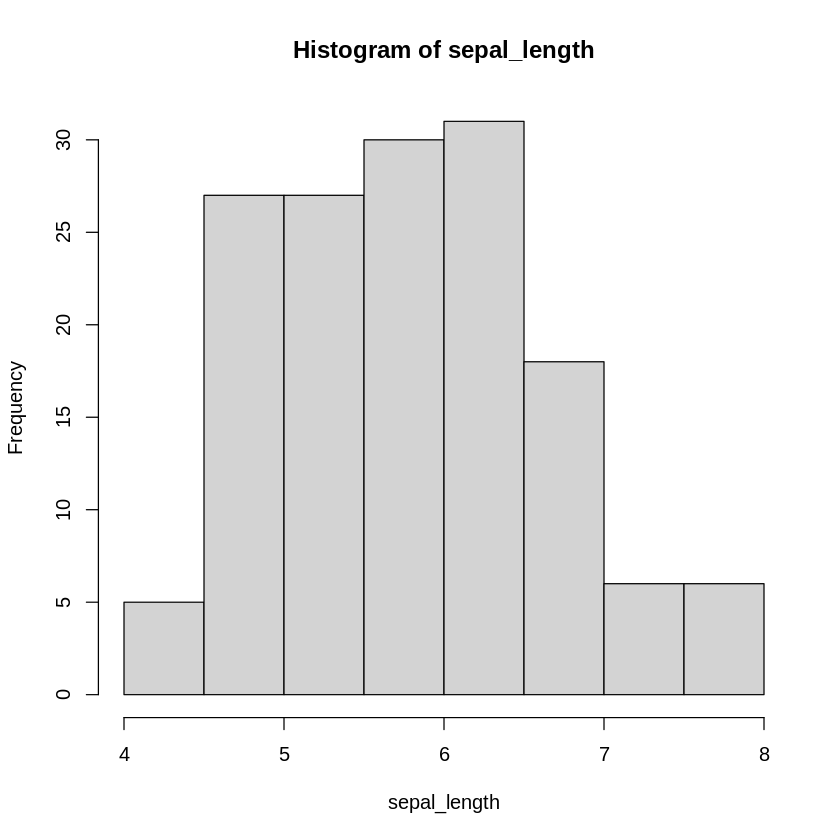

In [16]:
sepal_length<-iris$Sepal.Length
sepal_width<-iris$Sepal.Width
petal_length<-iris$Petal.Length
petal_width<-iris$Petal.Width
hist(sepal_length)

# Histogram of Sepal Width

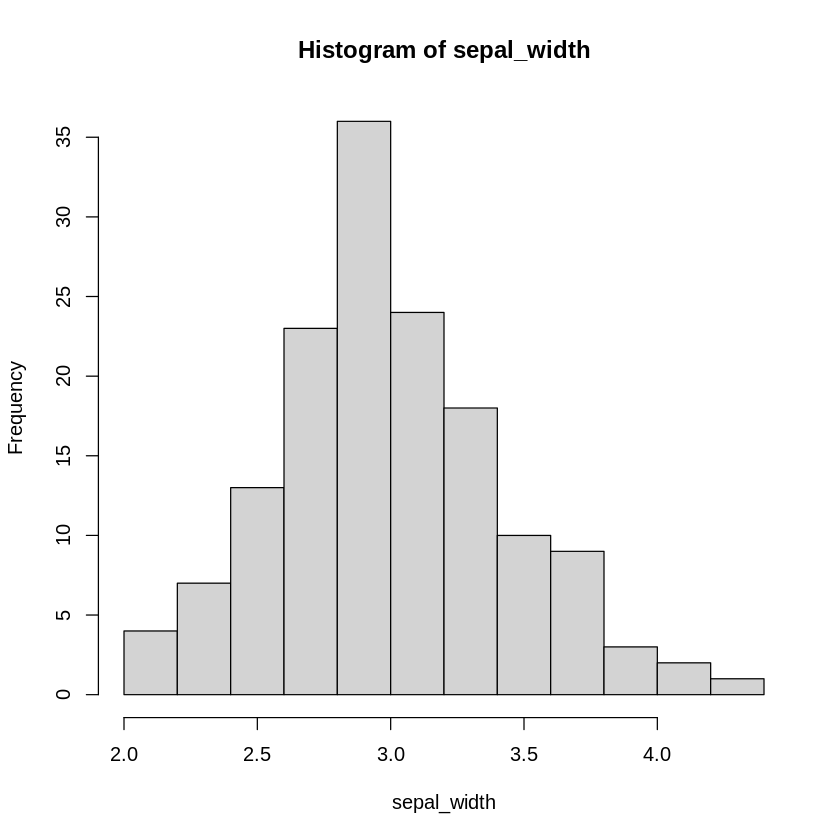

In [17]:
hist(sepal_width)


# Histogram of Petal Length

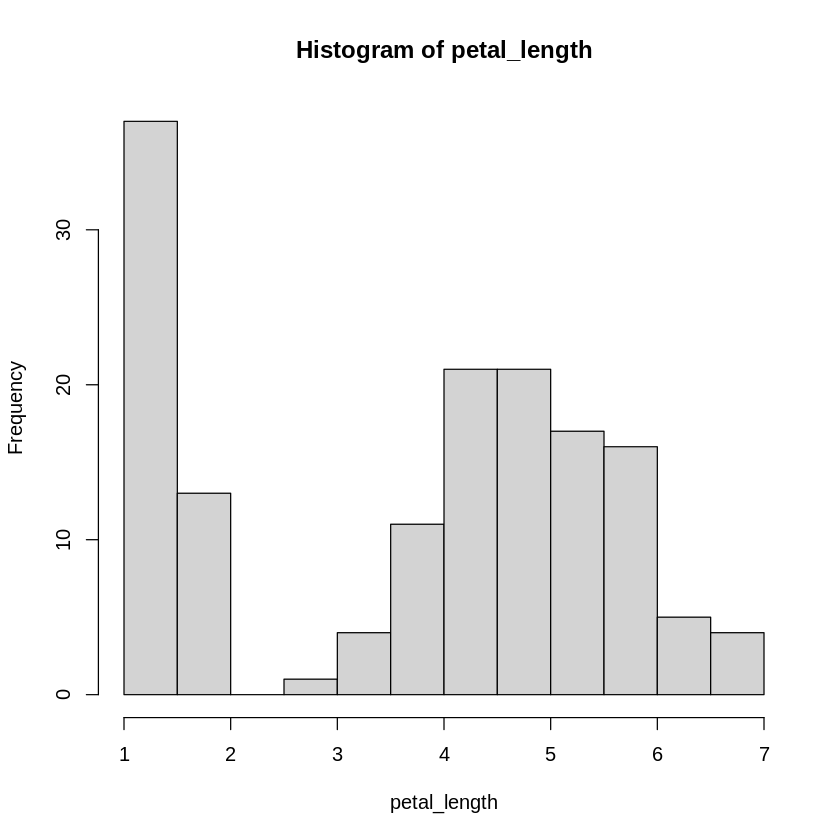

In [18]:
hist(petal_length)


# Histogram of Petal Width

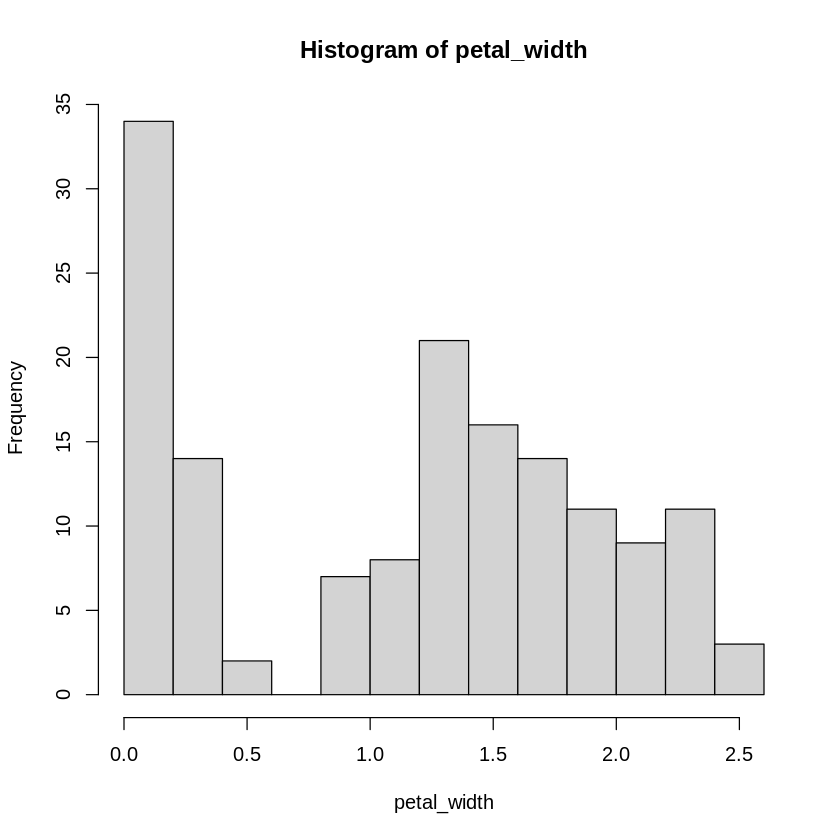

In [19]:
hist(petal_width)

# Finding correlation between all the parameters of iris dataset

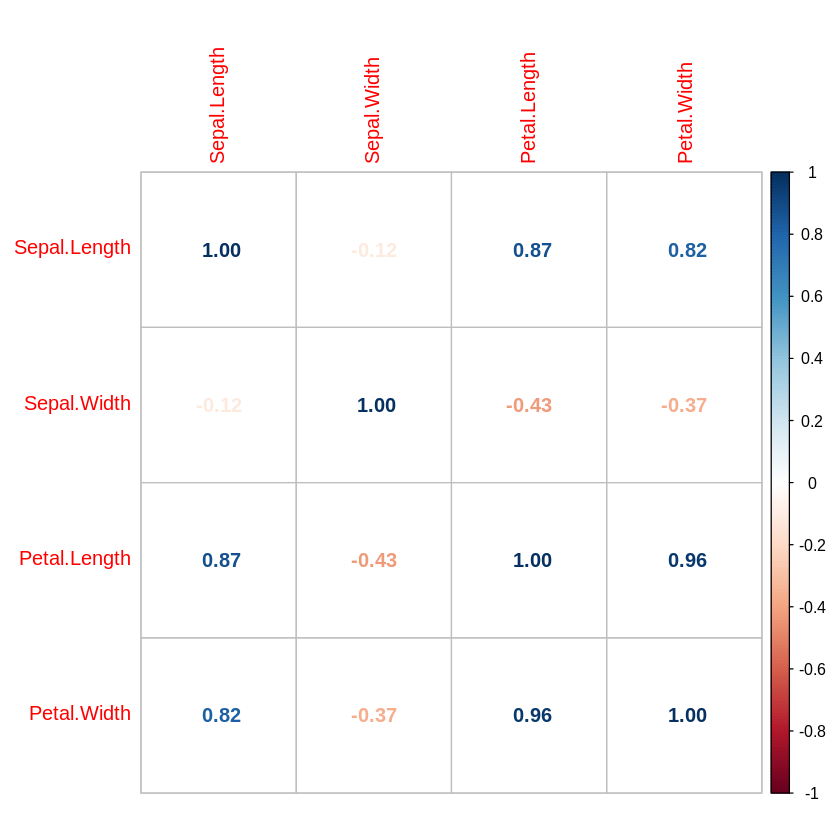

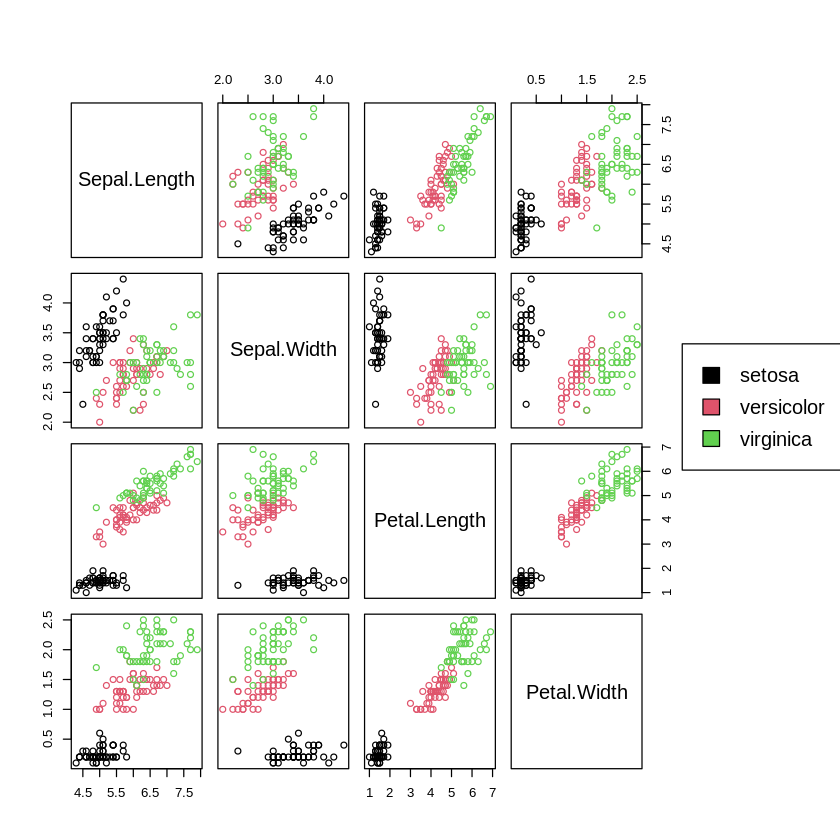

In [37]:
# install.packages("corrplot")
library(corrplot)
iris_num <- iris[c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width")]
cr<-cor(iris_num)
corrplot(cr,type="full",method="number")
pairs(iris[,1:4], col = iris[,5], oma = c(4,4,6,12))
par(xpd=TRUE)
legend(0.85,0.6, as.vector(unique(iris$Species)),fill=c(1,2,3))

In [38]:
# install.packages("caTools")
library(caTools)
split<-sample.split(iris,SplitRatio = 0.8)
training<-subset(iris,split==T)
testing<-subset(iris,split==F)
head(training)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


# Convert training data into categorical variable and then implementing random forest method to create a model and to find OOB error which is almost 0% in this case

mtry = 2  OOB error = 0% 
Searching left ...
Searching right ...


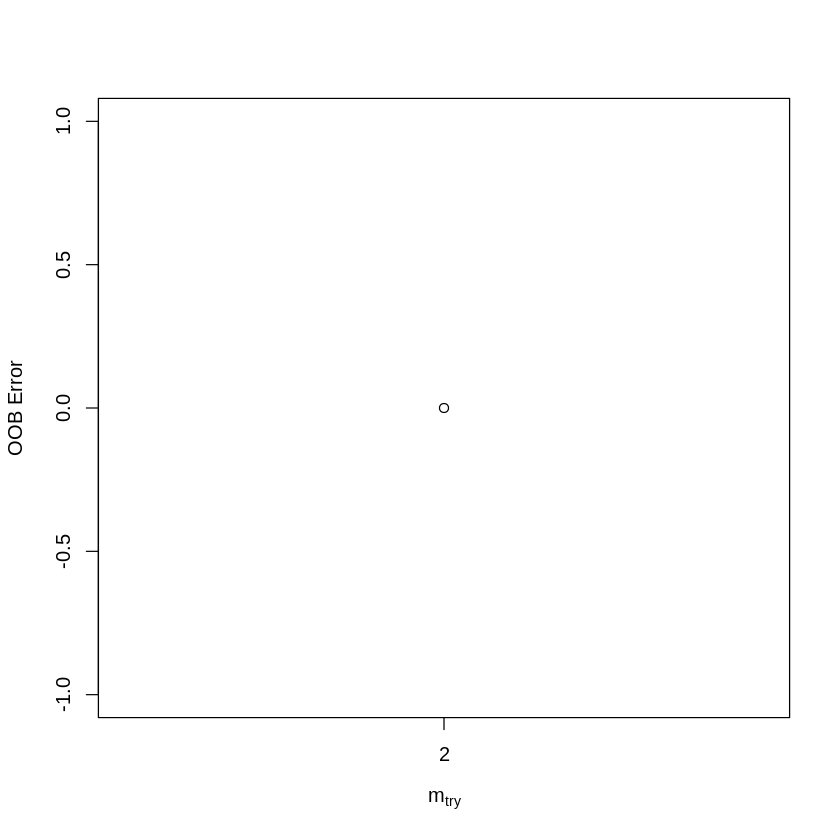

In [43]:
training$Species <- as.factor(training$Species)

# install.packages("randomForest")
library(randomForest)
bestmtry<-tuneRF(training,training$Species,type="classification",stepFactor=1,improve=0.01,trace=T,plot=T)
forest<-randomForest(Species~.,data=training,type="classification")

# Finding importance matrix here Variable importance measures indicate how much each predictor variable contributes to the overall predictive power of the model.

In [40]:
importance(forest)

,MeanDecreaseGini
Sepal.Length,8.105385
Sepal.Width,1.793738
Petal.Length,35.418952
Petal.Width,33.919359


4          9         14         19         24         29         34 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        39         44         49         54         59         64         69 
    setosa     setosa     setosa versicolor versicolor versicolor versicolor 
        74         79         84         89         94         99        104 
versicolor versicolor  virginica versicolor versicolor versicolor  virginica 
       109        114        119        124        129        134        139 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       144        149 
 virginica  virginica 
Levels: setosa versicolor virginica

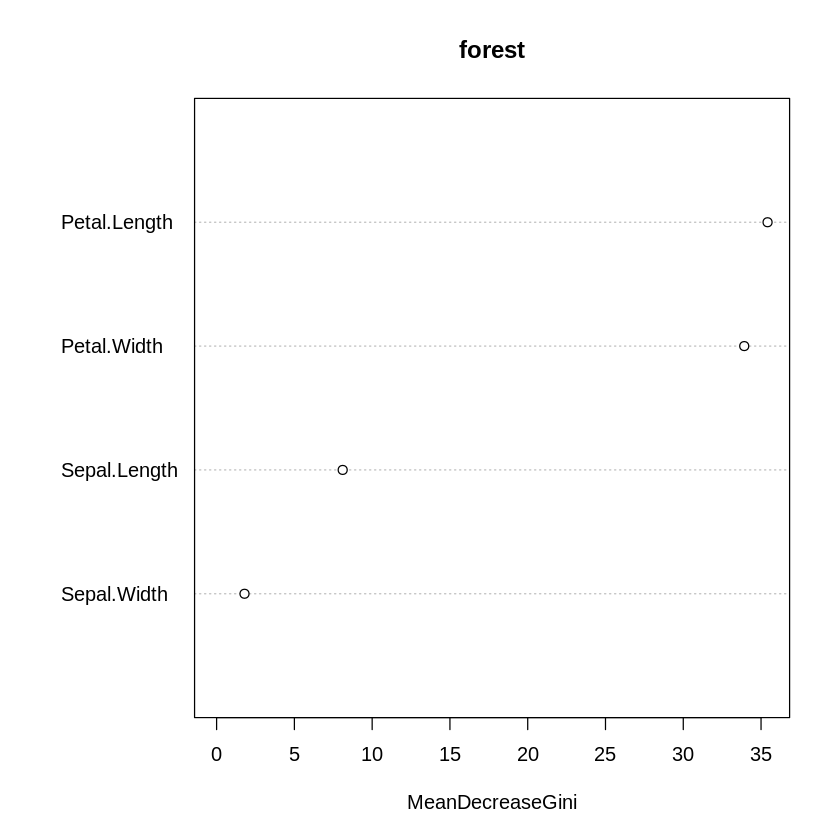

In [41]:
varImpPlot(forest)
predict_<-predict(forest,testing,type="class")
predict_


# Finding Confusion Matrix to determine accuracy of our model

In [42]:
# install.packages("caret")
library(caret)
confusionMatrix(table(predict_,testing$Species))


Confusion Matrix and Statistics

            
predict_     setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         0
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           1.0000
Specificity                 1.0000            1.0000           0.9500
Pos Pred Value              1.0000            1.0000           0.9091
Neg Pred Value              1.0000            0.9524           1.0000
Prevalence